In [1]:
!curl -L "https://public.roboflow.com/ds/CNs3ggBNAn?key=HvmHaWwBJv" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   901  100   901    0     0   3337      0 --:--:-- --:--:-- --:--:--  3337
100 18.5M  100 18.5M    0     0  26.8M      0 --:--:-- --:--:-- --:--:-- 26.8M
Archive:  roboflow.zip
 extracting: test/images/1288126-10255706714jpg_jpg.rf.ed230c79fdbb1fa0650ff4fd32f620ee.jpg  
 extracting: test/images/shutterstock_1627199179_jpg.rf.350e69105dd1458572a590c3e3ef2538.jpg  
 extracting: test/images/15391513324714o1n0r10n6_jpg.rf.eb6b6b796ad74b0c9d75011d1020f0af.jpg  
 extracting: train/images/1125506397_15801322206131n_jpg.rf.0a60284a71b2d0ed77c002e768b39b00.jpg  
 extracting: test/images/1579924271_jpg.rf.1fea0f43731fbea2876f63135256004f.jpg  
 extracting: train/images/1_R_kFK9pNLfKAuopY_lAaPQ_jpeg.rf.030922effaedbead963acea666441dbd.jpg  
 extracting: test/images/1224331650_g_400-w_g_jpg.rf.483a35a2395bf48e96783587a59fe876.jpg  
 extra

In [11]:
%cd /content
!git clone https://github.com/ultralytics/yolov5.git

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 14995, done.
remote: Total 14995 (delta 0), reused 0 (delta 0), pack-reused 14995
Receiving objects: 100% (14995/14995), 14.02 MiB | 32.69 MiB/s, done.
Resolving deltas: 100% (10286/10286), done.


In [12]:
%cd /content/yolov5
!pip install -r requirements.txt

/content/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 74.2 MB/s eta 0:00:00


In [2]:
%cat /content/dataset/data.yaml

cat: /content/dataset/data.yaml: No such file or directory


In [4]:
%cd /
from glob import glob

img_list1 = glob('/content/test/images/*.jpg')   # 이미지가 총 몇장인지 파악
img_list2 = glob('/content/train/images/*.jpg')
img_list3 = glob('/content/valid/images/*.jpg')

img_list = img_list1 + img_list2 + img_list3

print(len(img_list1) + len(img_list2) + len(img_list3))

/
149


In [5]:
from sklearn.model_selection import train_test_split

train_img_list, val_img_list = train_test_split(img_list, test_size=0.2, random_state=2000)  # 트레이닝 데이터와 테스트 데이터를 나눠줌

print(len(train_img_list), len(val_img_list))

119 30


In [7]:
with open('/content/train.txt', 'w') as f:  # 트레이닝 데이터
  f.write('\n'.join(train_img_list) + '\n')

with open('/content/val.txt', 'w') as f:  # 테스트 데이터
  f.write('\n'.join(val_img_list) + '\n') 

In [8]:
import yaml

with open('/content/data.yaml', 'r') as f:
  data = yaml.safe_load(f)

print(data)

data['train'] = '/content/train.txt'
data['val'] = '/content/val.txt'

with open('/content/data.yaml', 'w') as f:
  yaml.dump(data, f)

print(data)

{'train': '../train/images', 'val': '../valid/images', 'nc': 2, 'names': ['mask', 'no-mask']}
{'train': '/content/train.txt', 'val': '/content/val.txt', 'nc': 2, 'names': ['mask', 'no-mask']}


In [13]:
%cd /content/yolov5/

# 모델 학습시키기
!python train.py --batch 16 --epochs 10 --data /content/data.yaml --weights yolov5s.pt --name mask_yolov5s_results

/content/yolov5
train: weights=yolov5s.pt, cfg=, data=/content/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=mask_yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-71-gc442a2e Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0

In [14]:
%cd /content/yolov5/

from glob import glob

img_list = glob('/content/test/images/*.jpg')

print(len(img_list))

/content/yolov5
15


detect: weights=['/content/yolov5/runs/train/mask_yolov5s_results/weights/best.pt'], source=/content/test/images/126202-untitled-design-13_jpg.rf.baa3d2e55d469ae5d5d4cd81c4603e1d.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-71-gc442a2e Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/test/images/126202-untitled-design-13_jpg.rf.baa3d2e55d469ae5d5d4cd81c4603e1d.jpg: 256x416 5 masks, 12.5ms
Speed: 0.3ms pre-process, 12.5ms inference, 1.6ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect

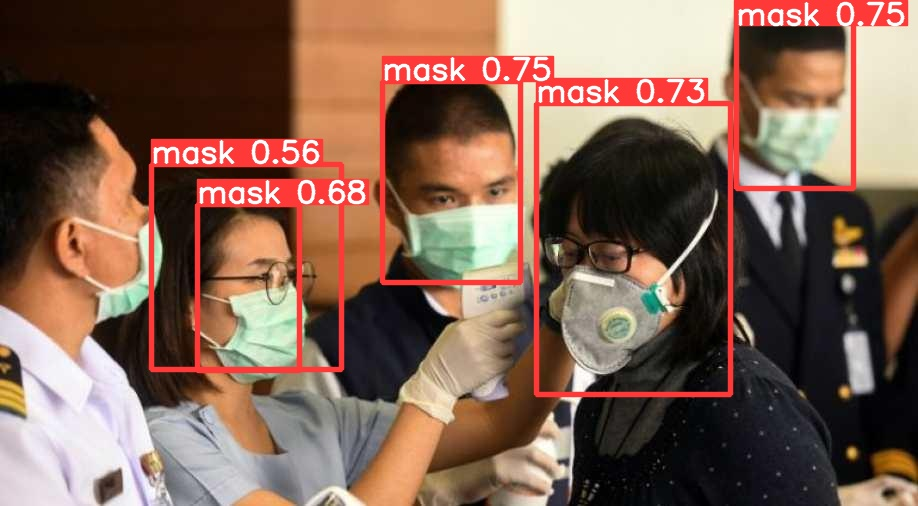

In [15]:
from IPython.display import Image
import os

val_img_path = img_list[1]

weights_path = '/content/yolov5/runs/train/mask_yolov5s_results/weights/best.pt'

!python detect.py --weights "{weights_path}" --img 416 --conf 0.5 --source "{val_img_path}"

detect_img_path = '/content/yolov5/runs/detect/exp'

Image(os.path.join(detect_img_path, os.path.basename(val_img_path)))